In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [91]:
h=pd.read_csv("horse.csv")

In [92]:
h.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [93]:
h.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [94]:
h.shape

(299, 28)

In [95]:
h.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [96]:
h=h.drop(['nasogastric_reflux_ph'],axis=1)

In [97]:
h.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'],
      dtype='object')

In [98]:
h.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [99]:
h['temp_of_extremities']=h['temp_of_extremities'].replace(to_replace=np.nan, value=h['temp_of_extremities'].mode()[0])

In [100]:
h.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,cool,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,cool,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [101]:
nal=["rectal_temp","pulse","respiratory_rate","temp_of_extremities","peripheral_pulse",
     "mucous_membrane","capillary_refill_time","pain","peristalsis","abdominal_distention",
     "nasogastric_tube","nasogastric_reflux","rectal_exam_feces",
     "abdomen","packed_cell_volume","total_protein","abdomo_appearance","abdomo_protein"]
for i in nal:
    h[i]=h[i].fillna(value=h[i].mode()[0])

In [102]:
h.isna().sum()
h.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,45.0,8.4,cloudy,2.0,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,cloudy,2.0,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,74.0,7.4,cloudy,2.0,died,no,4300,0,0,no


In [103]:
from sklearn import preprocessing

categorical = ['surgery', 'age','rectal_temp', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen',
       'abdomo_appearance', 'outcome',"surgical_lesion"]
for feature in categorical:
        le = preprocessing.LabelEncoder()
        h[feature] = le.fit_transform(h[feature])
       

In [104]:
h["abdomo_appearance"].head()

0    1
1    1
2    1
3    2
4    1
Name: abdomo_appearance, dtype: int32

In [105]:
h.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,23,66.0,28.0,1,3,3,2,...,45.0,8.4,1,2.0,0,0,11300,0,0,no
1,1,0,534817,30,88.0,20.0,1,2,4,1,...,50.0,85.0,1,2.0,1,0,2208,0,0,no
2,0,0,530334,21,40.0,24.0,2,2,5,1,...,33.0,6.7,1,2.0,2,0,0,0,0,yes
3,1,1,5290409,29,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.3,0,1,2208,0,0,yes
4,0,0,530255,11,104.0,35.0,1,2,2,2,...,74.0,7.4,1,2.0,0,0,4300,0,0,no


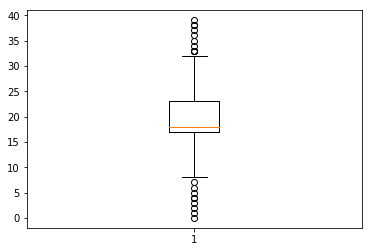

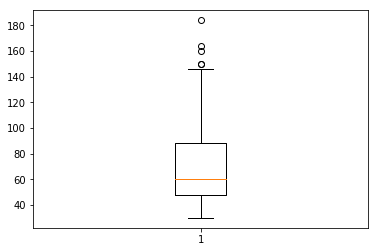

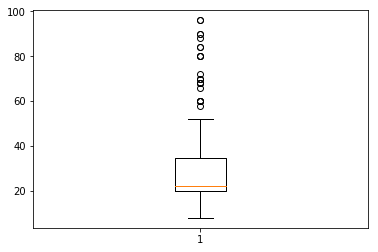

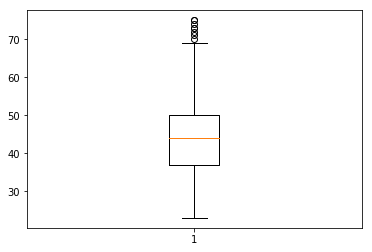

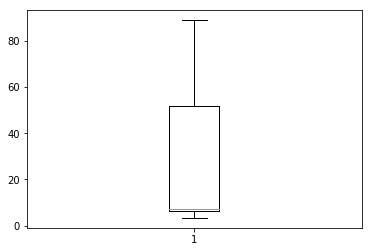

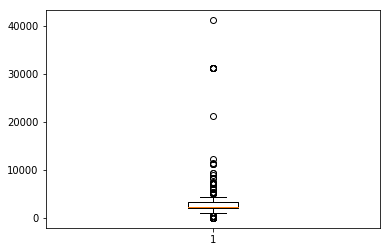

In [106]:
a=["rectal_temp","pulse","respiratory_rate","packed_cell_volume","total_protein","lesion_1"]
for i in a:
    plt.boxplot(h[i])
    plt.show()

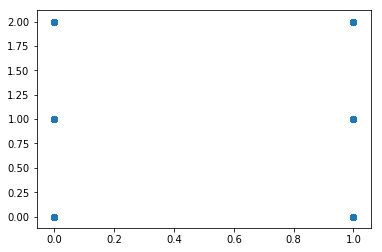

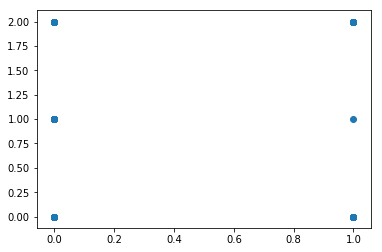

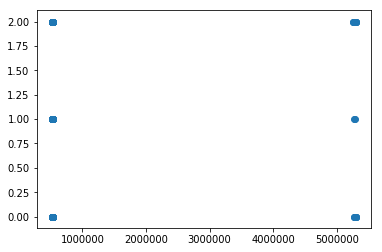

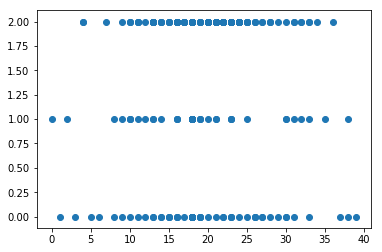

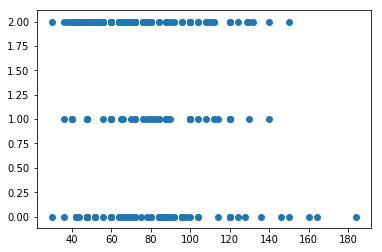

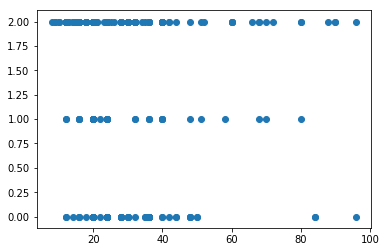

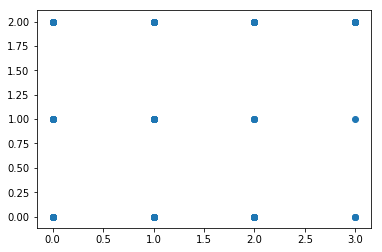

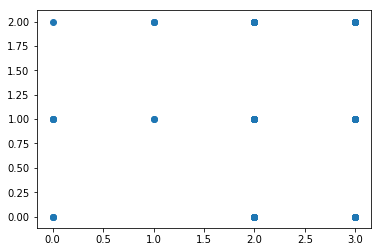

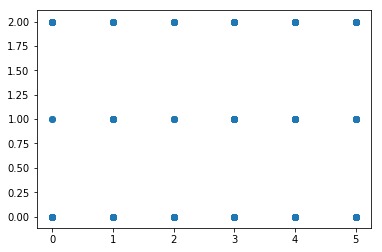

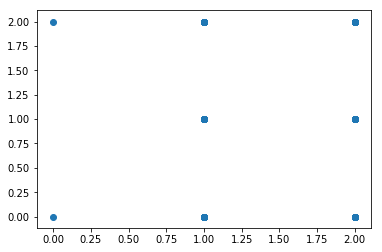

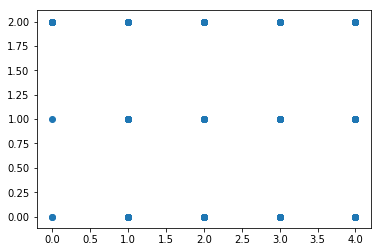

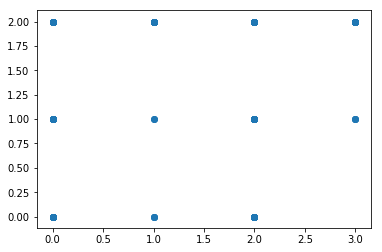

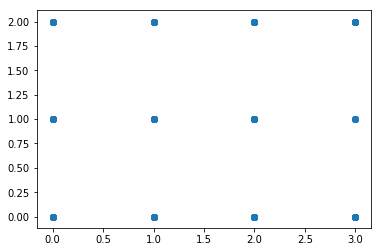

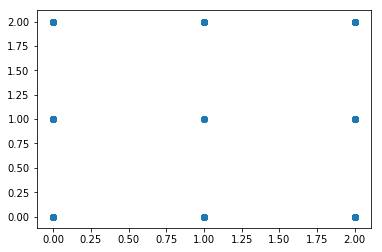

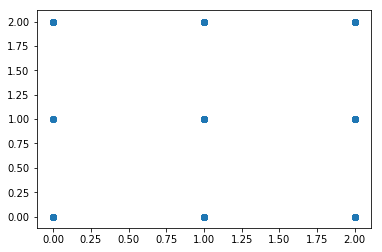

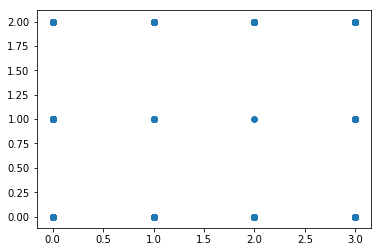

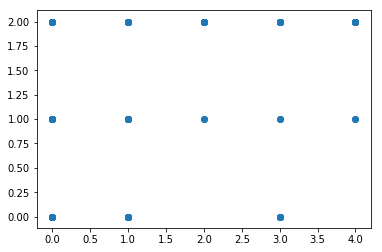

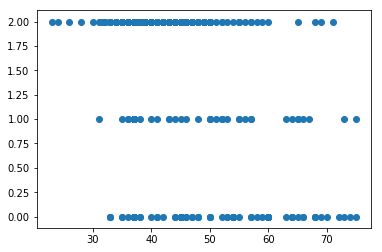

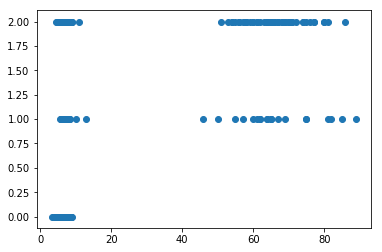

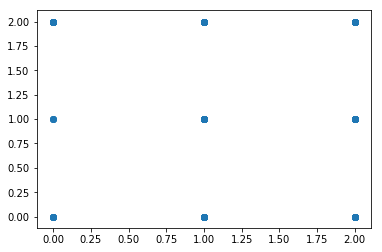

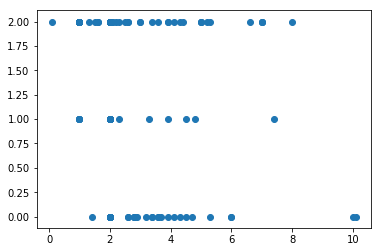

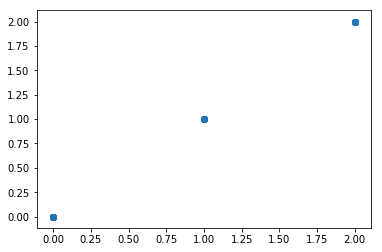

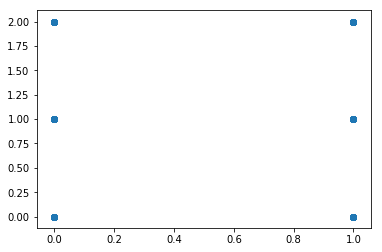

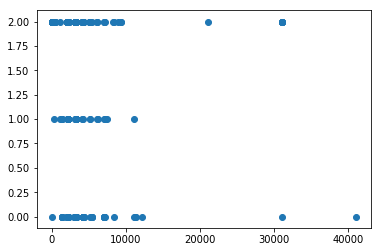

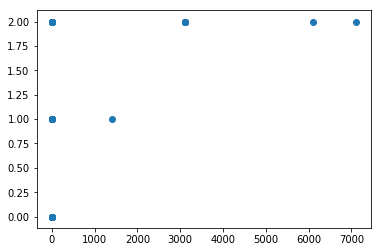

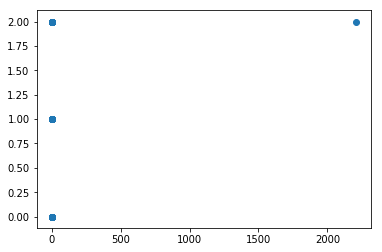

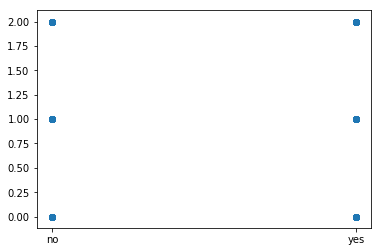

In [107]:
for j in h.columns:
    plt.scatter(x=h[j],y=h["outcome"])
    plt.show()

In [108]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=10)
x=h[['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3']]
y=h['outcome']
model.fit(x,y)
model.score(x,y)

0.7157190635451505

In [109]:
feature_imps=pd.DataFrame([h.columns,model.feature_importances_])
fescr=pd.DataFrame(np.array(feature_imps).T)
fescr.sort_values(by=1,ascending=False)

,0,1
0,surgery,0.2
2,hospital_number,0.2
17,packed_cell_volume,0.2
22,surgical_lesion,0.1
6,temp_of_extremities,0.1
7,peripheral_pulse,0.1
18,total_protein,0.1
14,nasogastric_reflux,0
23,lesion_1,0
21,outcome,0


In [110]:
x=h[['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3']]
y=h['outcome']
comp_model = LogisticRegression()
comp_model.fit(x,y)
comp_model.score(x,y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6688963210702341

In [111]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
modsvm=SVC(kernel="rbf")
x=h[['surgery','surgical_lesion',"packed_cell_volume","temp_of_extremities","temp_of_extremities","peripheral_pulse","total_protein"]]
y=h['outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
modsvm.fit(X_train,y_train)
modsvm.score(X_test,y_test)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6888888888888889

In [112]:
h.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,23,66.0,28.0,1,3,3,2,...,45.0,8.4,1,2.0,0,0,11300,0,0,no
1,1,0,534817,30,88.0,20.0,1,2,4,1,...,50.0,85.0,1,2.0,1,0,2208,0,0,no
2,0,0,530334,21,40.0,24.0,2,2,5,1,...,33.0,6.7,1,2.0,2,0,0,0,0,yes
3,1,1,5290409,29,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.3,0,1,2208,0,0,yes
4,0,0,530255,11,104.0,35.0,1,2,2,2,...,74.0,7.4,1,2.0,0,0,4300,0,0,no


In [113]:
from sklearn.tree import DecisionTreeClassifier
x=h[['surgery',"rectal_temp",'surgical_lesion',"packed_cell_volume","temp_of_extremities","temp_of_extremities","peripheral_pulse","total_protein"]]
y=h['outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =10)
desc=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)

desc.fit(X_train,y_train)
desc.score(X_test,y_test)

0.6777777777777778

In [114]:
from sklearn.neighbors import KNeighborsClassifier
modelk=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
x=h[['surgery','surgical_lesion',"packed_cell_volume","temp_of_extremities","temp_of_extremities","peripheral_pulse","total_protein"]]
y=h['outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
modelk.fit(X_train,y_train)
modelk.score(X_test,y_test)

0.7

In [115]:
h["outcome"].unique()

array([0, 1, 2], dtype=int64)

In [116]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scaled_values=scalar.fit_transform(h[[ 'rectal_temp',
       'packed_cell_volume','surgical_lesion', 'total_protein']])
le = preprocessing.LabelEncoder()


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [117]:
h.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,23,66.0,28.0,1,3,3,2,...,45.0,8.4,1,2.0,0,0,11300,0,0,no
1,1,0,534817,30,88.0,20.0,1,2,4,1,...,50.0,85.0,1,2.0,1,0,2208,0,0,no
2,0,0,530334,21,40.0,24.0,2,2,5,1,...,33.0,6.7,1,2.0,2,0,0,0,0,yes
3,1,1,5290409,29,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.3,0,1,2208,0,0,yes
4,0,0,530255,11,104.0,35.0,1,2,2,2,...,74.0,7.4,1,2.0,0,0,4300,0,0,no


In [118]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
modsvm=SVC(kernel="rbf")
x=h[['surgery','surgical_lesion',"packed_cell_volume","temp_of_extremities","temp_of_extremities","peripheral_pulse","total_protein"]]
y=h['outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
modsvm.fit(X_train,y_train)
modsvm.score(X_test,y_test)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6888888888888889

In [119]:
from sklearn.tree import DecisionTreeClassifier
x=h[['surgery',"rectal_temp",'surgical_lesion',"packed_cell_volume","temp_of_extremities","peripheral_pulse","total_protein"]]
y=h['outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =10)
desc=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)

desc.fit(X_train,y_train)
desc.score(X_test,y_test)

0.7111111111111111

In [120]:
h.corr()['outcome']

surgery                 -0.189222
age                     -0.101782
hospital_number         -0.106396
rectal_temp              0.040551
pulse                   -0.311773
respiratory_rate        -0.057938
temp_of_extremities      0.290367
peripheral_pulse        -0.165719
mucous_membrane          0.056852
capillary_refill_time   -0.256294
pain                    -0.161964
peristalsis              0.165844
abdominal_distention     0.112309
nasogastric_tube         0.049156
nasogastric_reflux       0.181422
rectal_exam_feces        0.193004
abdomen                  0.214875
packed_cell_volume      -0.369554
total_protein            0.266737
abdomo_appearance       -0.243140
abdomo_protein          -0.135177
outcome                  1.000000
surgical_lesion         -0.332933
lesion_1                -0.100738
lesion_2                 0.098993
lesion_3                 0.044631
Name: outcome, dtype: float64

In [121]:
h.var()

surgery                  2.403986e-01
age                      7.407241e-02
hospital_number          2.347121e+12
rectal_temp              3.886144e+01
pulse                    7.971825e+02
respiratory_rate         2.685146e+02
temp_of_extremities      6.167538e-01
peripheral_pulse         3.943346e-01
mucous_membrane          2.211129e+00
capillary_refill_time    2.036318e-01
pain                     1.582972e+00
peristalsis              8.438868e-01
abdominal_distention     1.099055e+00
nasogastric_tube         7.246526e-01
nasogastric_reflux       4.673296e-01
rectal_exam_feces        1.383381e+00
abdomen                  1.596014e+00
packed_cell_volume       1.059380e+02
total_protein            6.970027e+02
abdomo_appearance        2.916657e-01
abdomo_protein           1.542171e+00
outcome                  7.412179e-01
surgical_lesion          2.324302e-01
lesion_1                 2.925157e+07
lesion_2                 4.233287e+05
lesion_3                 1.632000e+04
dtype: float

In [122]:
from sklearn.svm import SVC
modsvm=SVC(kernel="rbf")
x=h[['surgery','surgical_lesion',"packed_cell_volume","temp_of_extremities","temp_of_extremities","peripheral_pulse","total_protein"]]
y=h['outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
modsvm.fit(X_train,y_train)
modsvm.score(X_test,y_test)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6888888888888889

In [123]:
h.corr()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
surgery,1.000000,0.089319,0.126044,-0.044371,0.165745,0.170552,-0.190183,0.115915,0.041470,0.079588,...,-0.297202,0.029030,0.031630,0.139274,0.029151,-0.189222,0.605023,0.163940,0.098594,0.047101
age,0.089319,1.000000,0.697331,0.190688,0.492692,0.368429,-0.014282,0.027843,-0.170800,-0.030065,...,-0.111078,-0.124240,-0.104989,-0.054823,-0.034036,-0.101782,0.044734,0.022870,0.017781,0.196089
hospital_number,0.126044,0.697331,1.000000,0.144806,0.310237,0.245490,0.000103,0.023254,-0.157237,0.025368,...,-0.155145,-0.098728,-0.215517,-0.107999,-0.053040,-0.106396,0.102425,0.145397,-0.050433,-0.020950
rectal_temp,-0.044371,0.190688,0.144806,1.000000,0.191953,0.234185,-0.030654,0.017706,-0.173840,0.107125,...,0.005561,0.056520,-0.030728,-0.079529,0.003825,0.040551,-0.036839,0.040822,-0.055494,0.033901
pulse,0.165745,0.492692,0.310237,0.191953,1.000000,0.430719,-0.254576,0.243200,-0.062074,0.378847,...,-0.183437,0.362897,-0.062850,0.239796,0.080429,-0.311773,0.236421,0.064901,0.007679,0.102606
respiratory_rate,0.170552,0.368429,0.245490,0.234185,0.430719,1.000000,-0.030480,0.121191,-0.088256,0.069983,...,-0.148288,0.059168,-0.081669,0.077674,-0.040418,-0.057938,0.179689,0.133732,-0.002598,0.147197
temp_of_extremities,-0.190183,-0.014282,0.000103,-0.030654,-0.254576,-0.030480,1.000000,-0.193530,-0.089494,-0.257690,...,0.169069,-0.270435,0.053845,-0.236222,-0.079070,0.290367,-0.226318,0.025731,0.026258,-0.027429
peripheral_pulse,0.115915,0.027843,0.023254,0.017706,0.243200,0.121191,-0.193530,1.000000,0.080396,0.226861,...,-0.121833,0.259239,-0.022800,0.164539,0.101571,-0.165719,0.165077,0.128019,0.001640,-0.025341
mucous_membrane,0.041470,-0.170800,-0.157237,-0.173840,-0.062074,-0.088256,-0.089494,0.080396,1.000000,-0.058657,...,0.017558,-0.128259,-0.012081,0.067207,-0.004078,0.056852,0.075724,0.074783,0.028010,0.000653
capillary_refill_time,0.079588,-0.030065,0.025368,0.107125,0.378847,0.069983,-0.257690,0.226861,-0.058657,1.000000,...,-0.142492,0.451013,-0.086351,0.257890,0.082703,-0.256294,0.165131,0.052515,0.008490,-0.032684


In [124]:
from sklearn.neighbors import KNeighborsClassifier
modelk=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
x=h[['surgery',"pulse",'surgical_lesion',"packed_cell_volume","temp_of_extremities","peripheral_pulse","total_protein"]]
y=h['outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
modelk.fit(X_train,y_train)
modelk.score(X_test,y_test)

0.7

In [125]:

p=pd.DataFrame(modelk.predict(X_test))

In [126]:
p["org"]=h["outcome"]

In [127]:
p.head(10)

,0,org
0,2,0
1,0,1
2,2,2
3,0,0
4,0,0
5,2,2
6,2,2
7,2,0
8,1,1
9,0,2


[0 1 2]


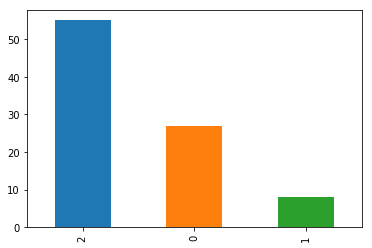

In [128]:
import numpy as np
labels = p[0]
print(np.unique(labels.values))

from matplotlib import pyplot as plot
%matplotlib inline
fig, ax = plot.subplots()
(labels.value_counts()).plot(ax=ax, kind='bar')

[0 1 2]


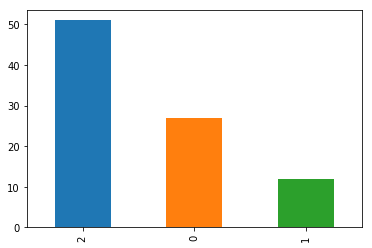

In [129]:
import numpy as np
labels = p["org"]
print(np.unique(labels.values))

from matplotlib import pyplot as plot
%matplotlib inline
fig, ax = plot.subplots()
(labels.value_counts()).plot(ax=ax, kind='bar')

##PCA

In [130]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
trainnX=pca.fit_transform(X_train)
testnX=pca.transform(X_test)

pca.explained_variance_

array([811.53312923, 685.47488139,  89.23350754])

In [131]:
from sklearn.svm import SVC
modsvm=SVC(kernel="rbf")

modsvm.fit(trainnX,y_train)
modsvm.score(testnX,y_test)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6555555555555556

In [132]:
from sklearn.tree import DecisionTreeClassifier

desc=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)

desc.fit(trainnX,y_train)
desc.score(testnX,y_test)

0.6555555555555556

In [133]:
from sklearn.neighbors import KNeighborsClassifier
modelk=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
modelk.fit(trainnX,y_train)
modelk.score(testnX,y_test)

0.6777777777777778

LDA


In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=3)
trainnx=lda.fit_transform(X_train,y_train)
testnx=lda.transform(X_test)


In [135]:
dec=DecisionTreeClassifier()
model=dec.fit(trainnx,y_train)
model.score(testnx,y_test)

0.6555555555555556

In [136]:
from sklearn.svm import SVC
modsvm=SVC(kernel="rbf")

modsvm.fit(trainnx,y_train)
modsvm.score(testnx,y_test)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7111111111111111

In [137]:
from sklearn.neighbors import KNeighborsClassifier
modelk=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
modelk.fit(trainnx,y_train)
modelk.score(testnx,y_test)

0.6444444444444445

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


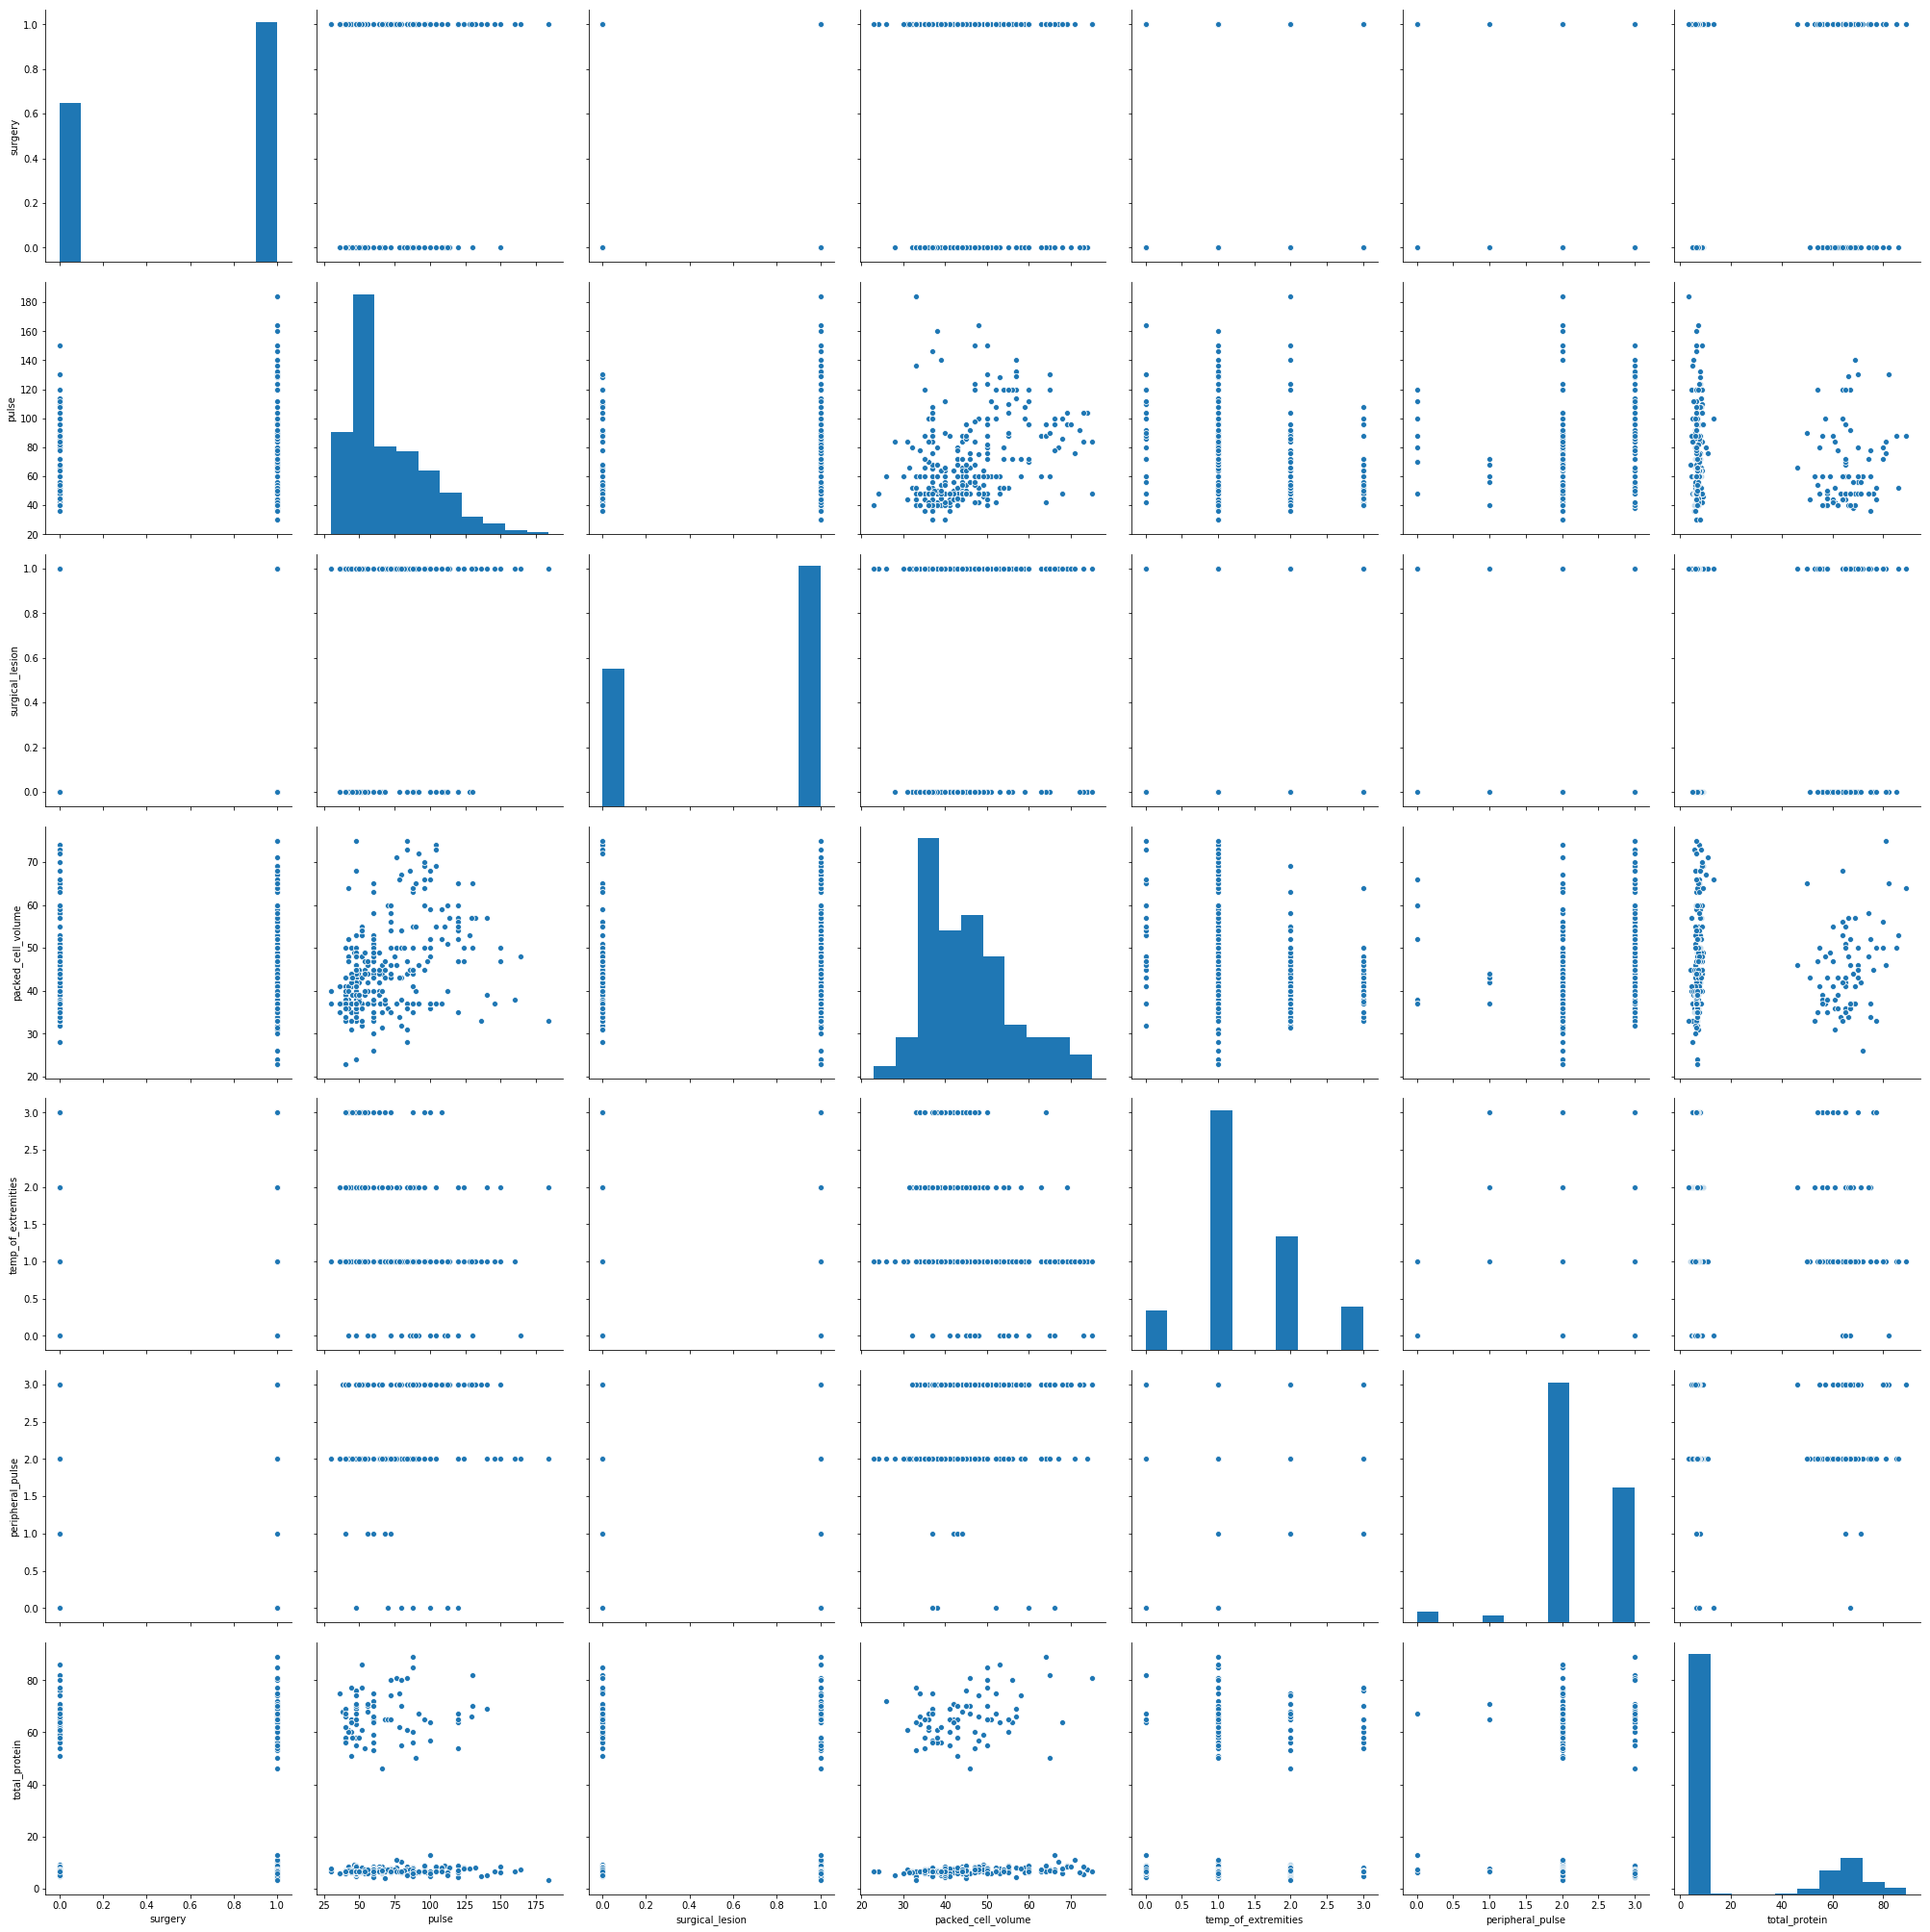

In [138]:
sns.pairplot(h[['surgery',"pulse",'surgical_lesion',"packed_cell_volume","temp_of_extremities","peripheral_pulse","total_protein"]],size=4)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


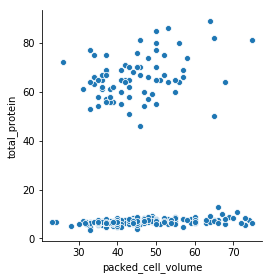

In [144]:
sns.pairplot(h,x_vars="packed_cell_volume",y_vars="total_protein",size=4)


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


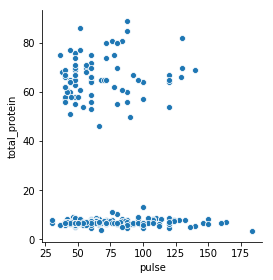

In [145]:
sns.pairplot(h,y_vars="total_protein",x_vars="pulse",size=4)


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


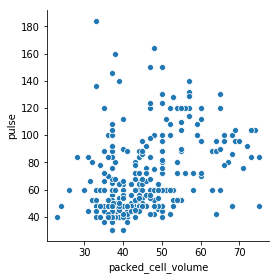

In [140]:
sns.pairplot(h,x_vars="packed_cell_volume",y_vars="pulse",size=4)


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


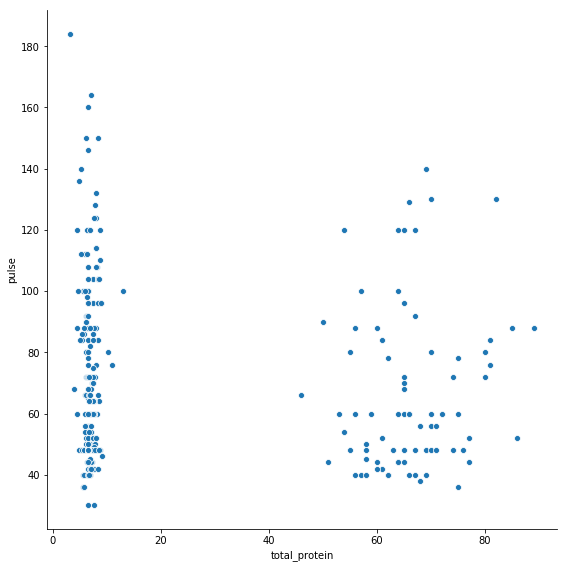

In [153]:
sns.pairplot(h,x_vars="total_protein",y_vars="pulse",size=8)